In [1]:
# BERT 모델 사용

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import transformers
from transformers import BertTokenizerFast
from transformers import TFBertForSequenceClassification

# Execution Environment for KLUE-BERT
# pip install tensorflow==2.7.0
# pip install transformers==4.8.0
# TensorFlow version: 2.7.0
# Transformers version: 4.8.0
print(f"TensorFlow version: {tf.__version__}")
print(f"Transformers version: {transformers.__version__}")

2023-02-28 05:29:58.558419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-28 05:29:58.558447: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow version: 2.7.0
Transformers version: 4.8.0


   labels                                          sentences
0       0  Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로...
1       0  테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2       2  국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ...
3       1  새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4       1  2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4...
BEFORE: Empty DataFrame
Columns: [labels, sentences]
Index: []
AFTER: Empty DataFrame
Columns: [labels, sentences]
Index: []
총 샘플의 수 : 4827


<AxesSubplot:>

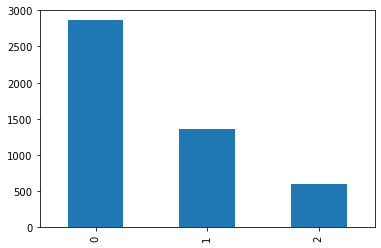

In [2]:
# 경제 뉴스 감정 데이터셋 다운로드
# 경제 뉴스 기사 내 4,846개 문장 & 감정 라벨, 0: Neutral 59.27%, 1: Positive 28.22%, 2: Negative 12.51%
# https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv
dataset = pd.read_csv("finance_data_preprocessed.csv") # UTF-8 encoding
print(dataset.head())

# 중복 데이터 확인 및 중복 데이터 제거
print("BEFORE:",dataset[dataset['sentences'].duplicated()]) # 중복 있음
dataset.drop_duplicates(subset = ['sentences'], inplace = True) # 중복 제거
print("AFTER:",dataset[dataset['sentences'].duplicated()]) # 중복 없음

print('총 샘플의 수 :',len(dataset))
dataset['labels'].value_counts().plot(kind = 'bar')

In [5]:
# 입출력 데이터 분리
X_data = dataset['sentences'].tolist()
y_data = dataset['labels'].tolist()

TEST_SIZE = 0.2 # Train:Test = 8:2 분리
RANDOM_STATE = 1234
X_train_list, X_test_list, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE, 
                                                    stratify = y_data)
print(f"훈련 입력 데이터 개수: {len(X_train_list)}")
print(f"테스트 입력 데이터 개수: {len(X_test_list)}")

훈련 입력 데이터 개수: 3861
테스트 입력 데이터 개수: 966


In [6]:
tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

2023-02-28 05:30:39.188200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-28 05:30:39.188224: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-28 05:30:39.188262: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-10-255-0-134): /proc/driver/nvidia/version does not exist
2023-02-28 05:30:39.190523: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
print(X_train[0].tokens)
print(X_train[0].ids)
print(X_train[0].type_ids)
print(X_train[0].attention_mask)

['[CLS]', '이', '거래', '이후', ',', '단', '##스케', '은행', '##은', '노르', '##딕', '국가', '##의', '노르', '##딕', '은행', '그룹', '노르', '##데', '##아', '##와', '동등', '##한', '선수', '##가', '된다', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',

In [8]:
epochs = 1

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=3, from_pt=True)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=epochs, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
)

'''
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001,
    patience=2
)
model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=epochs, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)
'''

model.evaluate(val_dataset.batch(1024))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 52s 52s/step - loss: 1.0986 - accuracy: 0.5932


[1.098612666130066, 0.5931677222251892]

In [9]:
# 모델 저장 : "output/klue-bert-base" 폴더 미리 만들어 놓을것

model.save_pretrained('output/klue-bert-base')
tokenizer.save_pretrained('output/klue-bert-base')

('output/klue-bert-base/tokenizer_config.json',
 'output/klue-bert-base/special_tokens_map.json',
 'output/klue-bert-base/vocab.txt',
 'output/klue-bert-base/added_tokens.json',
 'output/klue-bert-base/tokenizer.json')

In [10]:
# 모델 로드 및 테스트

from transformers import TextClassificationPipeline

loaded_tokenizer = BertTokenizerFast.from_pretrained('output/klue-bert-base')
loaded_model = TFBertForSequenceClassification.from_pretrained('output/klue-bert-base')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at output/klue-bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at output/klue-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [64]:
predicted_result = text_classifier('지쿠터 타고갈까')
print(predicted_dict)

# Get the predicted label name
label_map = {0: "Neutral", 1: "Positive", 2: "Negative"}

predicted_label_scores = []
for prediction_item in predicted_result:
    for prediction_dict in prediction_item:
        predicted_label_scores.append(prediction_dict['score'])
    predicted_label_id = np.argmax(predicted_label_scores)
    predicted_label_name = label_map[predicted_label_id]

print(predicted_label_name)

[[{'label': 'LABEL_0', 'score': 0.5566717386245728}, {'label': 'LABEL_1', 'score': 0.2830817699432373}, {'label': 'LABEL_2', 'score': 0.16024644672870636}]]
Neutral
